# Correlação com o crosstab de importações da Rússia e Ucrânia

## Setup

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [120]:
ods = pd.ExcelFile("rus_ua_imp.ods")
df_rus = pd.read_excel(ods, sheet_name="rus_imp", index_col=0)
df_ua = pd.read_excel(ods, sheet_name="ua_imp", index_col=0)

Dropa a coluna `Total` de ambos DataFrames

In [121]:
df_rus.drop("Total", inplace=True)
df_rus.drop("Total", axis=1, inplace=True)

In [122]:
df_ua.drop("Total", inplace=True)
df_ua.drop("Total", axis=1, inplace=True)

## Transformações

### Normalização

In [123]:
normz = StandardScaler()

In [124]:
for col in df_rus.columns:
    if isinstance(df_rus[col].name, pd.Timestamp):
        df_rus.rename({df_rus[col].name: str(df_rus[col].name.year)}, axis=1, inplace=True)
for col in df_ua.columns:
    if isinstance(df_ua[col].name, pd.Timestamp):
        df_ua.rename({df_ua[col].name: str(df_ua[col].name.year)}, axis=1, inplace=True)

In [125]:
df_rus_transf = pd.DataFrame(normz.fit_transform(df_rus), columns=df_rus.columns)

In [126]:
df_ua_transf = pd.DataFrame(normz.fit_transform(df_ua), columns=df_ua.columns)

### PCA

#### Rússia

In [127]:
pca_rus = PCA()

In [128]:
arr_rus = pca_rus.fit_transform(df_rus_transf)

In [139]:
df_rus_comp = pd.DataFrame(pca_rus.components_,
                           pca_rus.get_feature_names_out(),
                           df_rus.columns)
df_rus_comp.head(3)

,2018,2019,2020,2021,2022,2023
pca0,0.383672,0.422810,0.422539,0.422743,0.424193,0.369914
pca1,-0.600579,-0.207139,-0.054052,0.008842,0.133044,0.758747
pca2,0.655896,-0.107523,-0.369429,-0.370126,-0.185539,0.500344


#### Ucrânia

In [130]:
pca_ua = PCA()

In [131]:
arr_ua = pca_ua.fit_transform(df_ua_transf)

In [137]:
df_ua_comp = pd.DataFrame(pca_ua.components_,
                           pca_ua.get_feature_names_out(),
                           df_ua.columns)
df_ua_comp.head(3)

,2018,2019,2020,2021,2022
pca0,0.183220,0.355712,0.565078,0.485277,0.533940
pca1,-0.622904,-0.540115,0.288981,0.462134,-0.152275
pca2,0.760074,-0.531594,0.074116,0.278389,-0.238124


### Componentes

In [ ]:
df_ua_pca = pd.DataFrame(arr_ua, df_ua.index, pca_ua.get_feature_names_out())
df_ua_pca.head(2)

,pca0,pca1,pca2,pca3,pca4
Grupo de Mercadoria,,,,,
Plásticos e suas obras,7.050983,4.154795,1.309574,0.264323,-0.029748
"Obras de ferro fundido, ferro ou aço",2.987810,-0.696401,-1.861765,0.113628,0.209945


In [140]:
df_rus_pca = pd.DataFrame(arr_rus, df_rus.index, pca_rus.get_feature_names_out())
df_rus_pca.head(2)

,pca0,pca1,pca2,pca3,pca4,pca5
Grupo de Mercadoria,,,,,,
Adubos (fertilizantes),16.474304,0.533744,-0.794010,-0.001367,-0.000565,-0.000059
"Combustíveis minerais, óleos minerais e produtos da sua destilação; matérias betuminosas; ceras minerais",1.693978,3.352979,1.778863,0.001669,0.000454,-0.000296


## Plotagem

In [147]:
ano_estilos = {
    2018: ('#1f77b4', 'o'),
    2019: ('#ff7f0e', 's'),
    2020: ('#2ca02c', 'v'),
    2021: ('#d62728', '^'),
    2022: ('#9467bd', 'D'),
    2023: ('#8c564b', 'P')
}

### Rússia

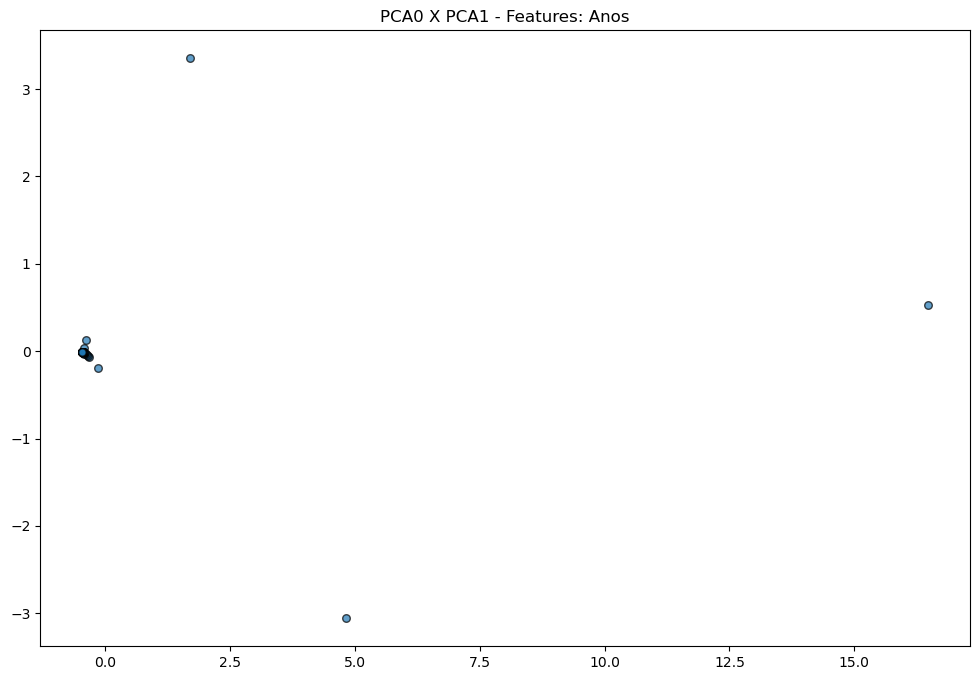

In [149]:
plt.figure(figsize=(12, 8))
plt.title("PCA0 X PCA1 - Features: Anos")
plt.scatter(df_rus_pca['pca0'], df_rus_pca['pca1'], alpha=0.7, edgecolor='k', s=30)
plt.show()

### Ucrânia

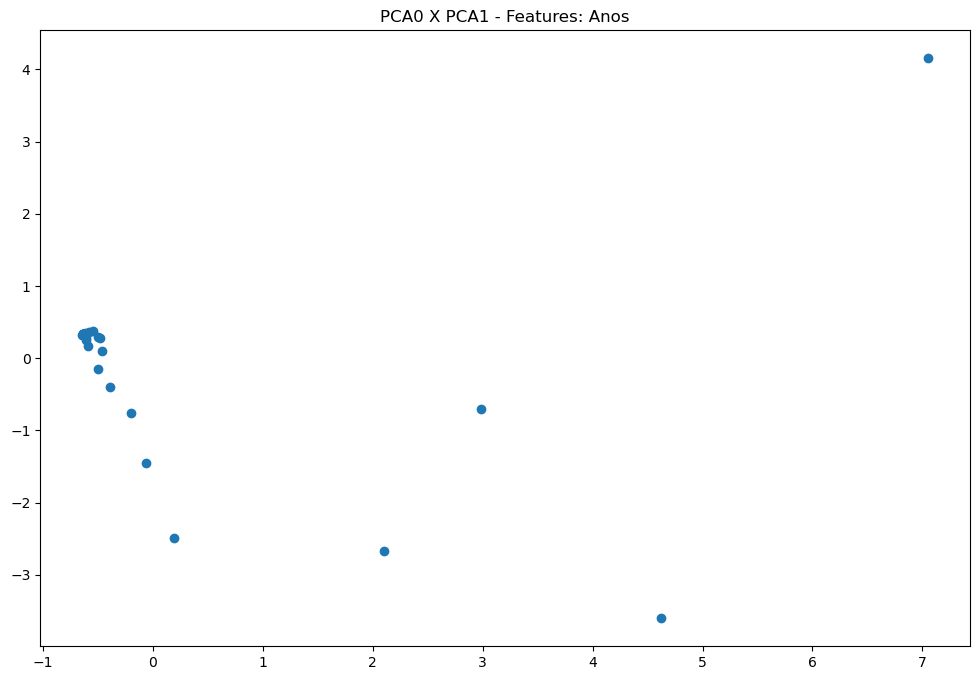

In [143]:
plt.figure(figsize=(12, 8))
plt.title("PCA0 X PCA1 - Features: Anos")
plt.scatter(df_ua_pca["pca0"], df_ua_pca["pca1"])
plt.show()